In [ ]:
demo(graphics)

In [7]:
library(MASS)
data(survey)
head(survey)


Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


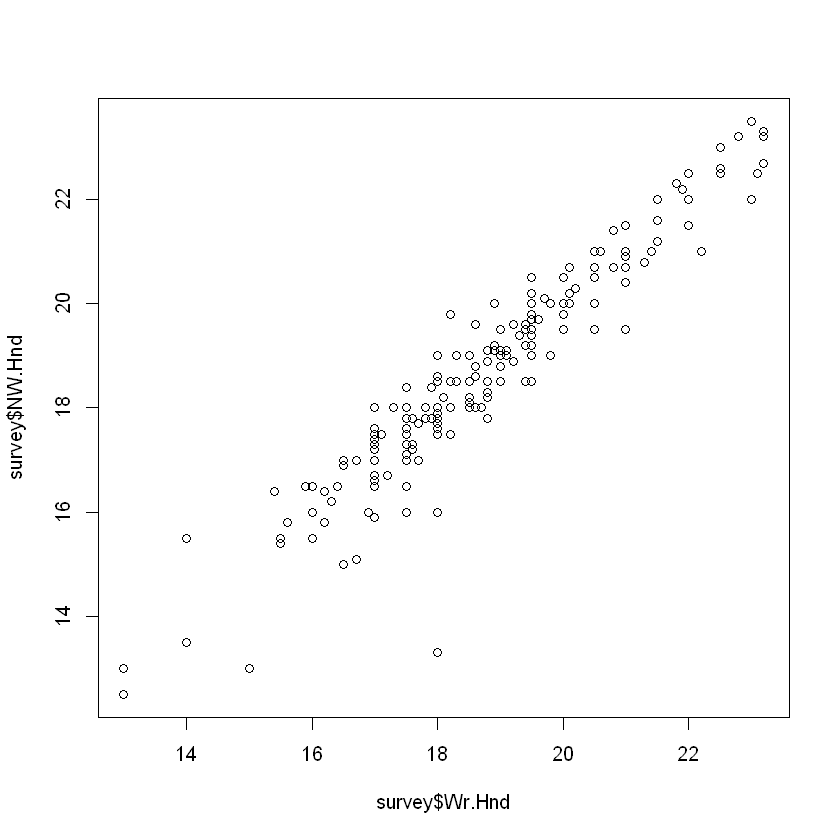

In [9]:
# Load in the DPR survey data and create a plot of age vs height - remember to correct the dodgy observation
plot(survey$Wr.Hnd, survey$NW.Hnd)

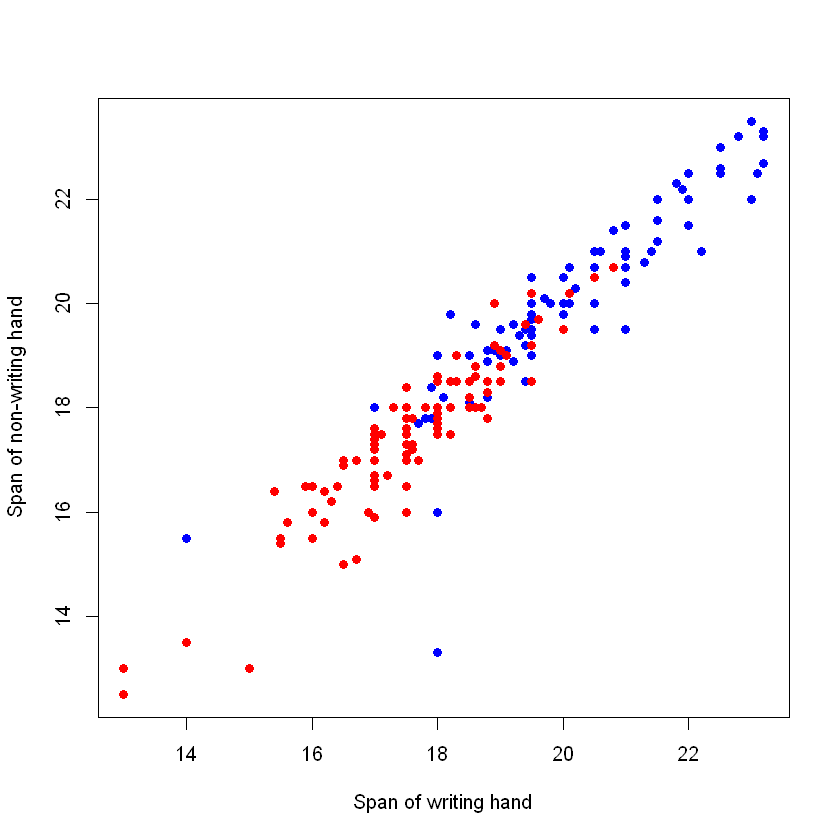

In [10]:
# Make a better plot using type='n' and using different colours for each sex
plot(survey$Wr.Hnd, survey$NW.Hnd, type = 'n', xlab = "Span of writing hand", ylab = "Span of non-writing hand")
points(survey$Wr.Hnd[survey$Sex == 'Male'], survey$NW.Hnd[survey$Sex == 'Male'], col = 'blue', pch = 16)
points(survey$Wr.Hnd[survey$Sex == 'Female'], survey$NW.Hnd[survey$Sex == 'Female'], col = 'red', pch = 16)


In [14]:
str(survey$Smoke)

 Factor w/ 4 levels "Heavy","Never",..: 2 4 3 2 2 2 2 2 2 2 ...


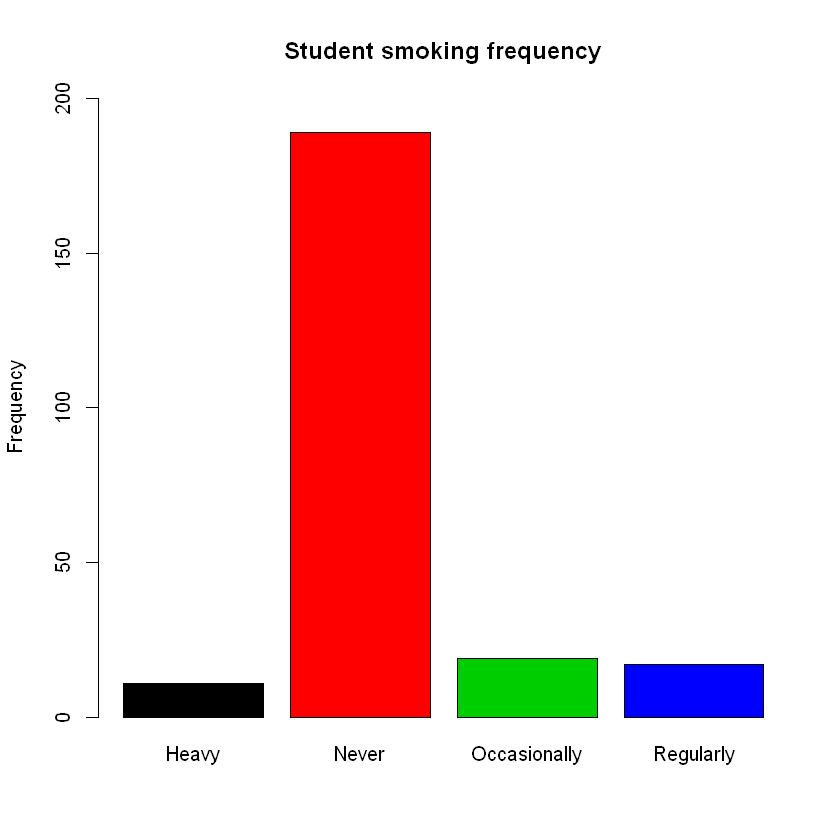

In [20]:
# Create bar chart of the smoke variable
barplot(table(survey$Smoke), col = 1:4, names.arg = c("Heavy", "Never", "Occasionally", "Regularly"), ylim = c(0,200), ylab = "Frequency")
title("Student smoking frequency")


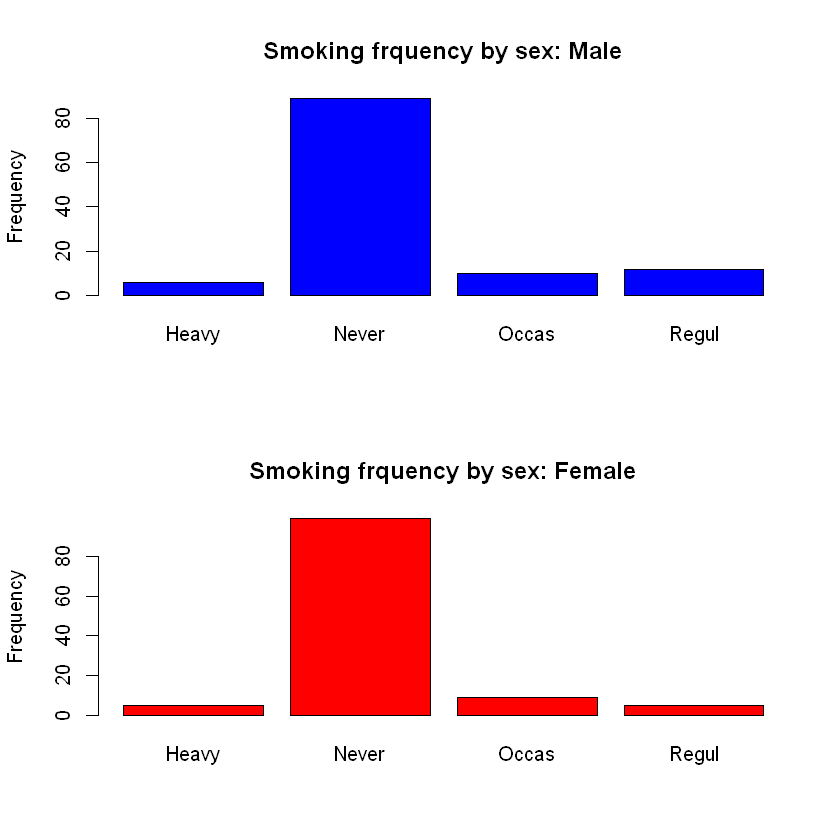

In [29]:
# Use par(mfrow=c(2,1)) to create two bar charts of smoking frequency by sex
par(mfrow = c(2,1))
barplot(table(survey$Smoke[survey$Sex == 'Male']), col = 'blue', main = 'Smoking frquency by sex: Male', ylab = "Frequency")
barplot(table(survey$Smoke[survey$Sex == 'Female']), col = 'red', main = 'Smoking frquency by sex: Female', ylab = "Frequency")
par(mfrow=c(1,1))


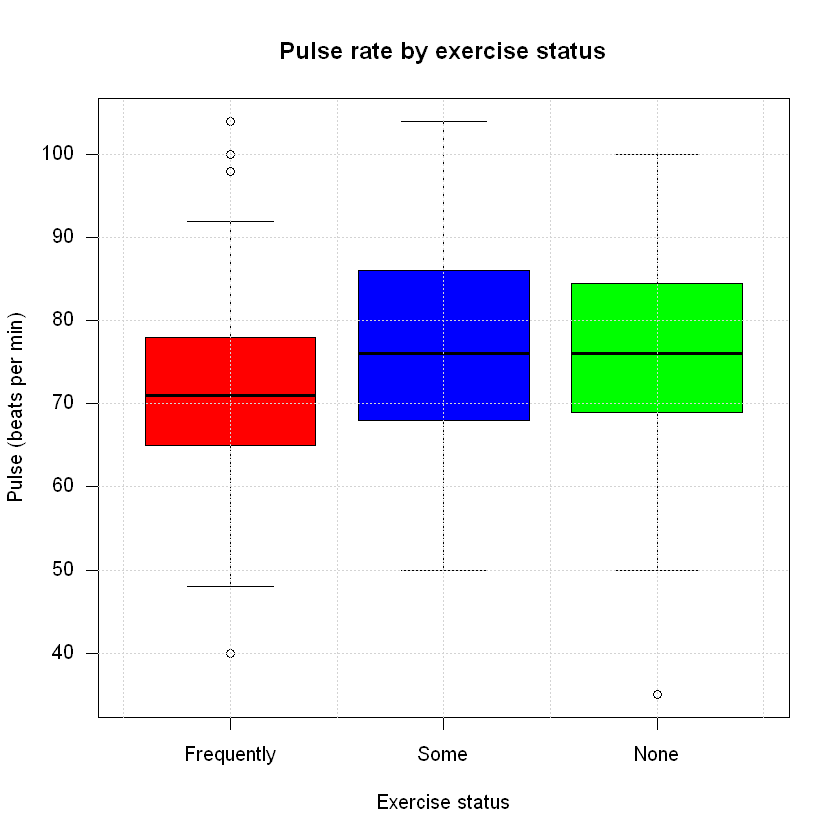

In [33]:
# Create a boxplot of height by sex, include a title, gridlines, axis labels,colours and make sure the y-axis is set correctly (using las=1)
boxplot(survey$Pulse ~ survey$Exer, las = 1, main = 'Pulse rate by exercise status', col = c('red', 'blue', 'green'), ylab = 'Pulse (beats per min)', names = c("Frequently", "Some", "None"), xlab = "Exercise status")
grid()


In [37]:
# Make it easier to access the data
library(MASS)
x <- birthwt$age
y <- birthwt$low

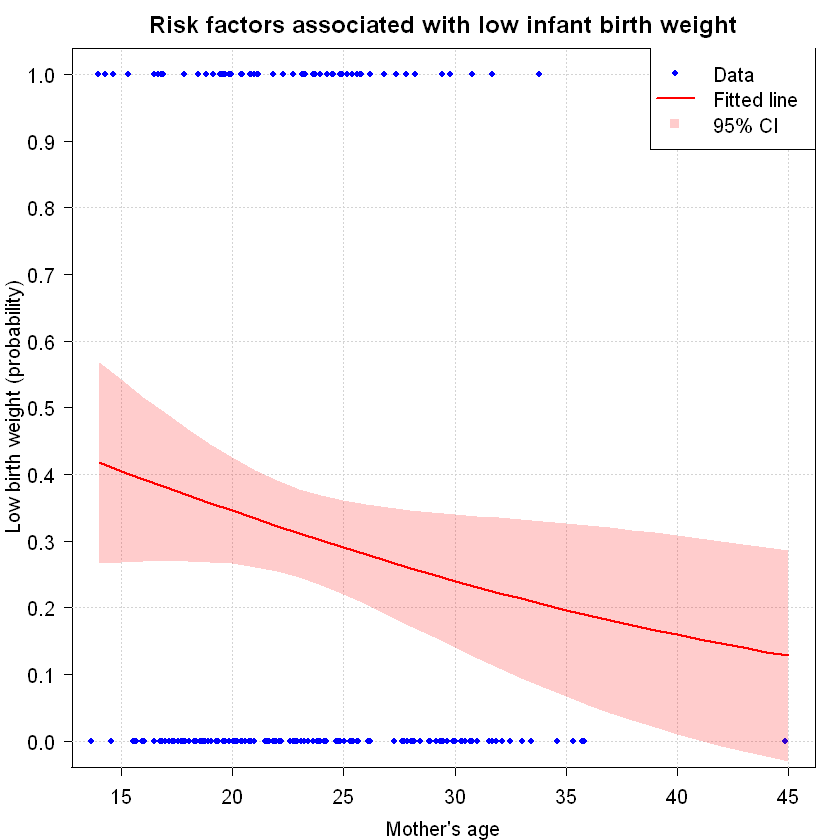

In [43]:
# Set up the plot frame
par(mar = c(3, 3, 2, 1), mgp = c(2, 0.7, 0), tck = -0.01, las = 1)
plot(x, y, type = 'n', xaxt = 'n', yaxt = 'n', las = 1, xlab = "Mother's age", ylab = 'Low birth weight (probability)')
title('Risk factors associated with low infant birth weight')
axis(1, at = pretty(x, n = 10), labels = TRUE)
axis(2, at = pretty(y, n = 10), las = 1)
grid()

# Add in the data
points(jitter(x, amount = 0.5), y, col = 'blue', pch = 20)

# Add in the fitted line
mod <- glm(y ~ x, family = binomial)
xgrid <- seq(min(x), max(x), by = 1)
ypred <- predict(mod, data.frame(x = xgrid), se.fit = TRUE, type = 'response')
lines(xgrid, ypred$fit, col = 'red', lwd = 2)


# Create a polygon with uncertainties in a translucent colour
newcol <- rgb(1, 0, 0, 0.2) 
ypred.lower <- ypred$fit - 1.96 * ypred$se.fit
ypred.upper <- ypred$fit + 1.96 * ypred$se.fit
polygon(c(xgrid, rev(xgrid)), c(ypred.lower, rev(ypred.upper)), col = newcol, border = NA)

# Add in the legend
legend('topright', legend = c('Data', 'Fitted line', '95% CI'), pch = c(20, -1, 15), lty = c(-1, 1, -1), lwd = c(-1, 2, -1), 
       col = c('blue', 'red', newcol))

